In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import joblib

In [2]:
df = pd.read_csv("data\\data.csv")
df.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5,Research_0,Research_1
0,1.762107,1.746971,1.093864,1.167321,1.764818,0.92,False,False,False,True,False,False,True
1,0.627656,-0.067635,0.596653,1.167321,0.455151,0.76,False,False,False,True,False,False,True
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631,0.72,False,False,True,False,False,False,True
3,0.453126,0.427257,0.099442,-1.061454,0.119339,0.80,False,False,True,False,False,False,True
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029,0.65,False,True,False,False,False,True,False


CHECK FOR LINEARITY

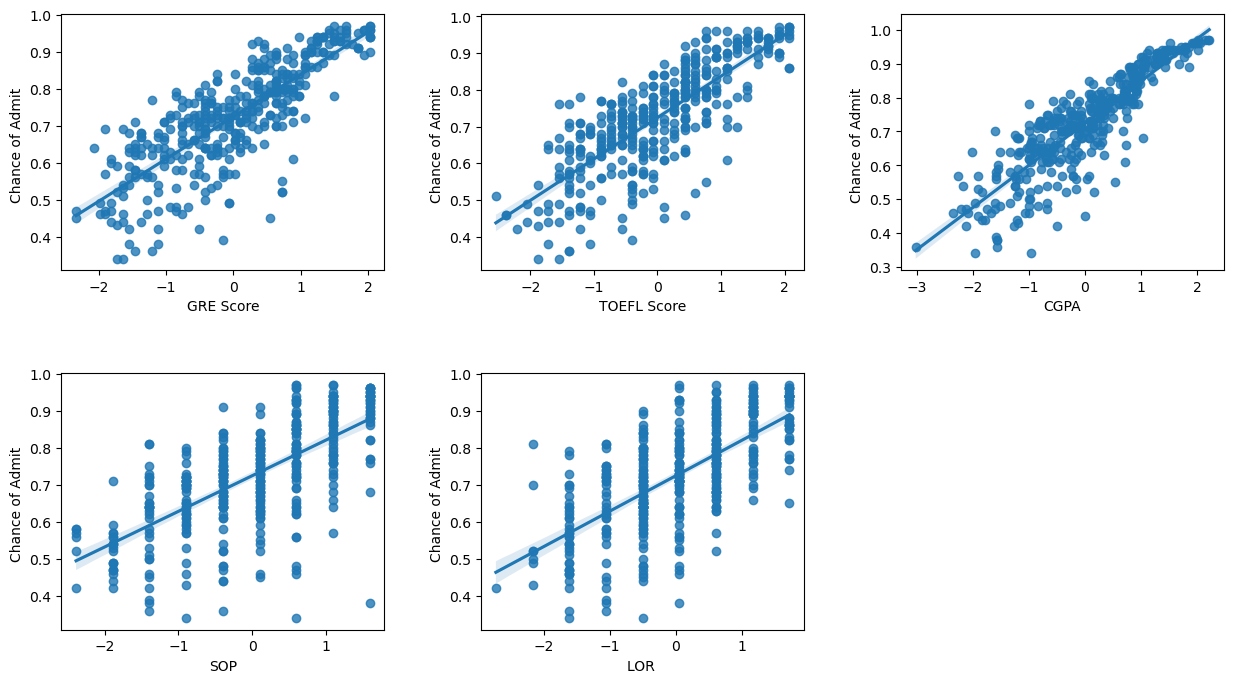

In [3]:
plt.figure(figsize=(15, 8)) 

plt.subplot(2, 3, 1)
sns.regplot(data=df, x="GRE Score", y="Chance of Admit ", order=1)
plt.subplot(2, 3, 2)
sns.regplot(data=df, x="TOEFL Score", y="Chance of Admit ", order=1)
plt.subplot(2, 3, 3)
sns.regplot(data=df, x="CGPA", y="Chance of Admit ", order=1)
plt.subplot(2, 3, 4)
sns.regplot(data=df, x="SOP", y="Chance of Admit ", order=1)
plt.subplot(2, 3, 5)
sns.regplot(data=df, x="LOR ", y="Chance of Admit ", order=1)

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

# all relations are linear

CHECK VARIABLE INFLATION FACTOR

In [4]:
x = df[df.columns[0:5]]
x = add_constant(x)
vif_df = pd.DataFrame()
vif_df["feature"] = x.columns
vif_df["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_df
# keep all features 

,feature,VIF
0,const,1.000000
1,GRE Score,4.206338
2,TOEFL Score,4.217736
3,SOP,2.768170
4,LOR,2.368375
5,CGPA,5.029001


TRAIN TEST SPLIT

In [5]:
X = df[df.columns]
X.drop(columns=["Chance of Admit "], inplace=True)
y = df["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5,Research_0,Research_1,Chance of Admit
333,0.191329,0.097329,-0.397769,0.052933,-0.098939,False,False,True,False,False,False,True,0.71
273,-0.419528,-1.387349,-2.386613,-2.175842,-0.988841,True,False,False,False,False,False,True,0.52
307,0.714922,0.757186,0.596653,0.610127,0.673429,False,False,False,True,False,False,True,0.80
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029,False,True,False,False,False,True,False,0.65
292,-1.292182,-1.387349,-2.386613,-1.618648,-1.056003,False,True,False,False,False,True,False,0.56


ORDINARY LEAST SQUARES (OLS)

In [6]:
escaped_cols = [f"Q('{col}')" for col in X_train.columns]
formula = "Q('Chance of Admit ') ~ " + " + ".join(escaped_cols)
fit = smf.ols(formula=formula, data=df_train).fit()
fit.summary()
# R-squared: 0.818
# drop SOP

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Chance of Admit ')   R-squared:                       0.818
Model:                               OLS   Adj. R-squared:                  0.812
Method:                    Least Squares   F-statistic:                     138.5
Date:                   Wed, 09 Apr 2025   Prob (F-statistic):          7.84e-108
Time:                           09:54:16   Log-Likelihood:                 437.57
No. Observations:                    320   AIC:                            -853.1
Df Residuals:                        309   BIC:                            -811.7
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.4279      0.002    179.462      0.000       0.423       0.433
Q('University Rating_1')[T.True]     0.0899      0.014      6.297      0.000       0.062       0.118
Q('University Rating_2')[T.True]     0.0760      0.008      9.999      0.000       0.061       0.091
Q('University Rating_3')[T.True]     0.0744      0.006     11.958      0.000       0.062       0.087
Q('University Rating_4')[T.True]     0.0841      0.009      9.384      0.000       0.066       0.102
Q('University Rating_5')[T.True]     0.1035      0.011      9.335      0.000       0.082       0.125
Q('Research_0')[T.True]              0.2042      0.005     43.234      0.000       0.195       0.213
Q('Research_1')[T.True]              0.2237      0.004     50.617      0.000       0.215       0.232
Q('GRE Score')                       0.0206      0.008      2.619      0.009       0.005       0.036
Q('TOEFL Score')                     0.0129      0.007      1.746      0.082      -0.002       0.027
Q('SOP')                            -0.0004      0.006     -0.068      0.946      -0.012       0.011
Q('LOR ')                            0.0202      0.005      3.754      0.000       0.010       0.031
Q('CGPA')                            0.0730      0.008      8.884      0.000       0.057       0.089
==============================================================================
Omnibus:                       68.330   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.997
Skew:                          -1.106   Prob(JB):                     1.08e-30
Kurtosis:                       5.336   Cond. No.                     3.22e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [7]:
escaped_cols = [f"Q('{col}')" for col in X_train.columns]
escaped_cols.remove("Q('SOP')")
formula = "Q('Chance of Admit ') ~ " + " + ".join(escaped_cols)
fit = smf.ols(formula=formula, data=df_train).fit()
fit.summary()
# R-squared: 0.818

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Chance of Admit ')   R-squared:                       0.818
Model:                               OLS   Adj. R-squared:                  0.812
Method:                    Least Squares   F-statistic:                     154.4
Date:                   Wed, 09 Apr 2025   Prob (F-statistic):          6.14e-109
Time:                           09:54:16   Log-Likelihood:                 437.57
No. Observations:                    320   AIC:                            -855.1
Df Residuals:                        310   BIC:                            -817.5
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.4279      0.002    180.211      0.000       0.423       0.433
Q('University Rating_1')[T.True]     0.0902      0.014      6.568      0.000       0.063       0.117
Q('University Rating_2')[T.True]     0.0761      0.007     10.313      0.000       0.062       0.091
Q('University Rating_3')[T.True]     0.0744      0.006     11.977      0.000       0.062       0.087
Q('University Rating_4')[T.True]     0.0840      0.009      9.665      0.000       0.067       0.101
Q('University Rating_5')[T.True]     0.1033      0.011      9.767      0.000       0.082       0.124
Q('Research_0')[T.True]              0.2042      0.005     43.680      0.000       0.195       0.213
Q('Research_1')[T.True]              0.2237      0.004     50.946      0.000       0.215       0.232
Q('GRE Score')                       0.0206      0.008      2.636      0.009       0.005       0.036
Q('TOEFL Score')                     0.0128      0.007      1.753      0.081      -0.002       0.027
Q('LOR ')                            0.0201      0.005      4.023      0.000       0.010       0.030
Q('CGPA')                            0.0729      0.008      8.951      0.000       0.057       0.089
==============================================================================
Omnibus:                       68.411   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.190
Skew:                          -1.107   Prob(JB):                     9.83e-31
Kurtosis:                       5.337   Cond. No.                     3.44e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.85e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
escaped_cols = [f"Q('{col}')" for col in X_train.columns]
escaped_cols.remove("Q('SOP')")
escaped_cols.remove("Q('TOEFL Score')")
formula = "Q('Chance of Admit ') ~ " + " + ".join(escaped_cols)
fit = smf.ols(formula=formula, data=df_train).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Chance of Admit ')   R-squared:                       0.816
Model:                               OLS   Adj. R-squared:                  0.811
Method:                    Least Squares   F-statistic:                     172.1
Date:                   Wed, 09 Apr 2025   Prob (F-statistic):          2.08e-109
Time:                           09:54:16   Log-Likelihood:                 435.99
No. Observations:                    320   AIC:                            -854.0
Df Residuals:                        311   BIC:                            -820.1
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.4281      0.002    179.761      0.000       0.423       0.433
Q('University Rating_1')[T.True]     0.0868      0.014      6.363      0.000       0.060       0.114
Q('University Rating_2')[T.True]     0.0756      0.007     10.218      0.000       0.061       0.090
Q('University Rating_3')[T.True]     0.0743      0.006     11.927      0.000       0.062       0.087
Q('University Rating_4')[T.True]     0.0858      0.009      9.917      0.000       0.069       0.103
Q('University Rating_5')[T.True]     0.1055      0.011     10.024      0.000       0.085       0.126
Q('Research_0')[T.True]              0.2046      0.005     43.646      0.000       0.195       0.214
Q('Research_1')[T.True]              0.2235      0.004     50.748      0.000       0.215       0.232
Q('GRE Score')                       0.0268      0.007      3.820      0.000       0.013       0.041
Q('LOR ')                            0.0198      0.005      3.963      0.000       0.010       0.030
Q('CGPA')                            0.0777      0.008     10.090      0.000       0.063       0.093
==============================================================================
Omnibus:                       67.172   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.796
Skew:                          -1.084   Prob(JB):                     1.97e-30
Kurtosis:                       5.358   Cond. No.                     2.55e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

CREATE NEW TRAIN TEST SPLIT

In [9]:
# with TOEFL Score
X = df[df.columns]
X.drop(columns=["Chance of Admit ", "SOP"], inplace=True)
y = df["Chance of Admit "]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=54)

In [10]:
# without TOEFL Score
X = df[df.columns]
X.drop(columns=["Chance of Admit ", "SOP", "TOEFL Score"], inplace=True)
y = df["Chance of Admit "]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=54)

LINEAR REGRESSION

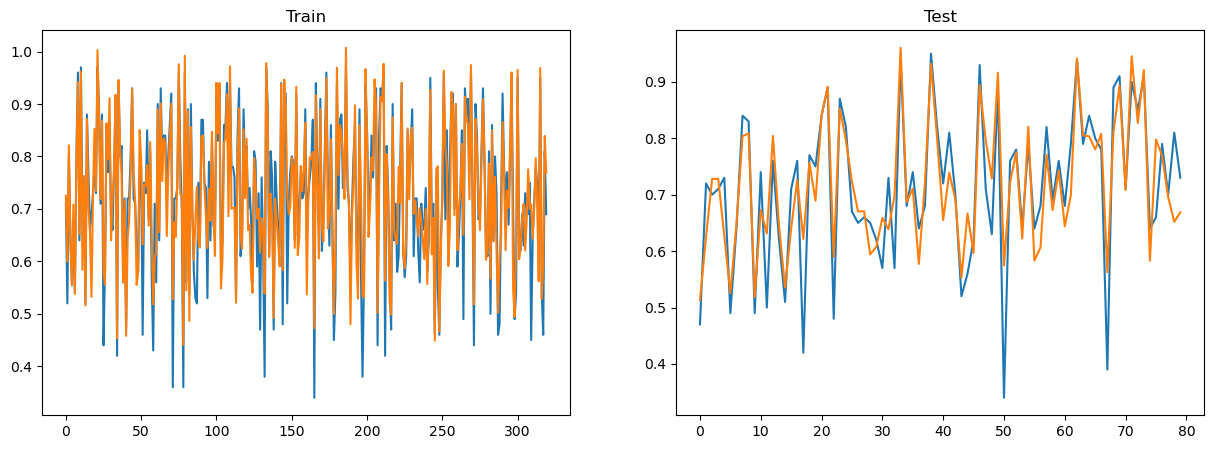

Mean Squared Error (Train):  0.003800275077982603
Mean Squared Error (Test):  0.0046946825750463494


In [11]:
# with TOEFL Score
linear_model1 = LinearRegression()
linear_model1.fit(X_train1, y_train1)

y_train_pred1 = linear_model1.predict(X_train1)
y_test_pred1 = linear_model1.predict(X_test1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(y_train1.values)
plt.plot(y_train_pred1)
plt.title("Train")

plt.subplot(1, 2, 2)
plt.plot(y_test1.values)
plt.plot(y_test_pred1)
plt.title("Test")

plt.show()

print("Mean Squared Error (Train): ", mean_squared_error(y_train1, y_train_pred1))
print("Mean Squared Error (Test): ", mean_squared_error(y_test1, y_test_pred1))

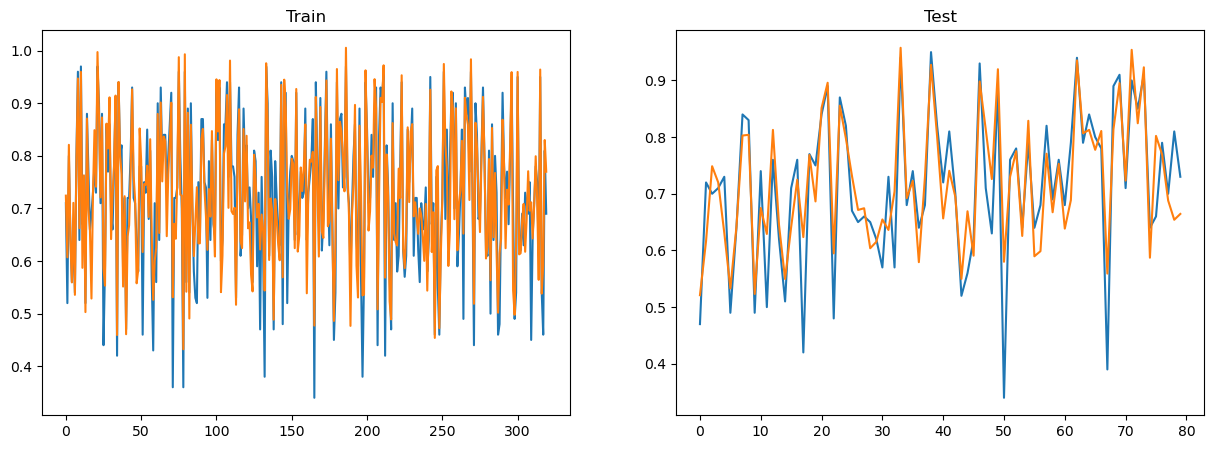

Mean Squared Error (Train):  0.0038379585305342765
Mean Squared Error (Test):  0.004901743478501642


In [12]:
# without TOEFL Score
linear_model2 = LinearRegression()
linear_model2.fit(X_train2, y_train2)

y_train_pred2 = linear_model2.predict(X_train2)
y_test_pred2 = linear_model2.predict(X_test2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(y_train2.values)
plt.plot(y_train_pred2)
plt.title("Train")

plt.subplot(1, 2, 2)
plt.plot(y_test2.values)
plt.plot(y_test_pred2)
plt.title("Test")

plt.show()

print("Mean Squared Error (Train): ", mean_squared_error(y_train2, y_train_pred2))
print("Mean Squared Error (Test): ", mean_squared_error(y_test2, y_test_pred2))

RANDOM FOREST REGRESSOR

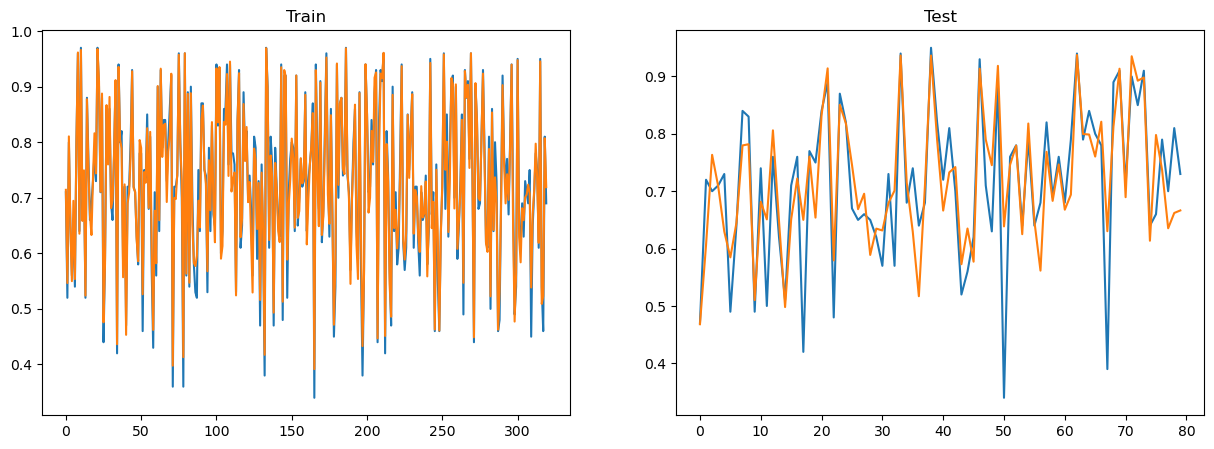

Mean Squared Error (Train):  0.0006179021875000003
Mean Squared Error (Test):  0.0062321111250000045


In [13]:
# with TOEFL Score
random_model1 = RandomForestRegressor()
random_model1.fit(X_train1, y_train1)

y_train_pred1 = random_model1.predict(X_train1)
y_test_pred1 = random_model1.predict(X_test1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(y_train1.values)
plt.plot(y_train_pred1)
plt.title("Train")

plt.subplot(1, 2, 2)
plt.plot(y_test1.values)
plt.plot(y_test_pred1)
plt.title("Test")

plt.show()

print("Mean Squared Error (Train): ", mean_squared_error(y_train1, y_train_pred1))
print("Mean Squared Error (Test): ", mean_squared_error(y_test1, y_test_pred1))

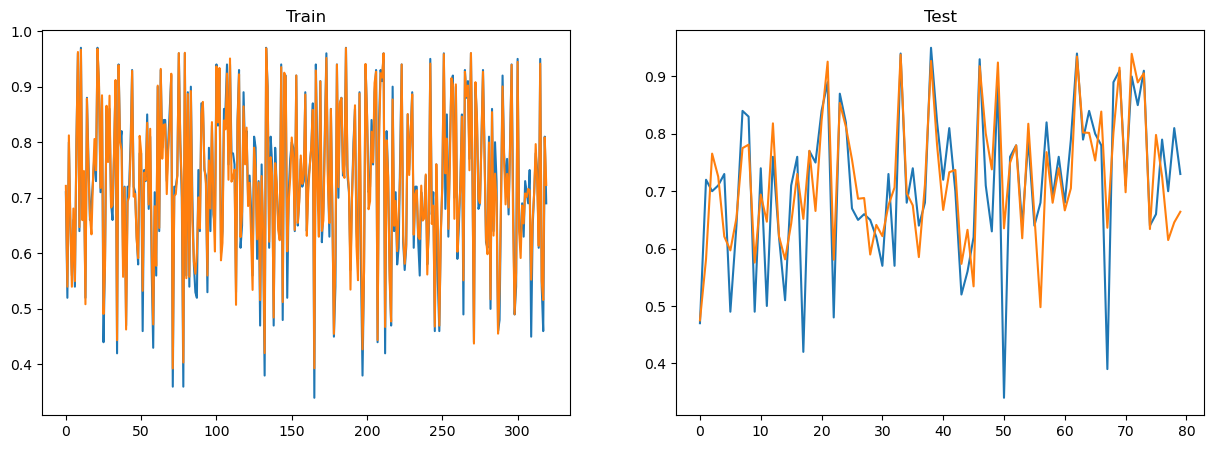

Mean Squared Error (Train):  0.0006101184374999998
Mean Squared Error (Test):  0.006751344875000002


In [14]:
# without TOEFL Score
random_model2 = RandomForestRegressor()
random_model2.fit(X_train2, y_train2)

y_train_pred2 = random_model2.predict(X_train2)
y_test_pred2 = random_model2.predict(X_test2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(y_train2.values)
plt.plot(y_train_pred2)
plt.title("Train")

plt.subplot(1, 2, 2)
plt.plot(y_test2.values)
plt.plot(y_test_pred2)
plt.title("Test")

plt.show()

print("Mean Squared Error (Train): ", mean_squared_error(y_train2, y_train_pred2))
print("Mean Squared Error (Test): ", mean_squared_error(y_test2, y_test_pred2))

In [15]:
# with TOEFL Score
print("Linear R²:", linear_model1.score(X_test1, y_test1))
print("Random Forest R²:", random_model1.score(X_test1, y_test1))


Linear R²: 0.7388467517451234
Random Forest R²: 0.6533235127695429


In [16]:
# without TOEFL Score
print("Linear R²:", linear_model2.score(X_test2, y_test2))
print("Random Forest R²:", random_model2.score(X_test2, y_test2))

Linear R²: 0.7273284804542459
Random Forest R²: 0.6244398602012495


SAVE THE MODELS

In [17]:
joblib.dump(linear_model1, "models\\model1.pkl")
joblib.dump(linear_model2, "models\\model2.pkl")

['models\\model2.pkl']